# Classificação com Dados Sintéticos
Este notebook demonstra os fundamentos da classificação supervisionada usando dados artificiais.

In [2]:
# Importação das bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Configuração de estilo
sns.set(style='whitegrid')

## 1. Geração de Dados Sintéticos

Vamos gerar um conjunto de dados com duas classes e duas features, utilizando `make_classification` do Scikit-learn. 
Esses dados simulam um problema de classificação binária simples.

In [10]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, 
                           n_redundant=0, n_clusters_per_class=1,
                           flip_y=0.1, class_sep=1.0, random_state=42)

## 2. Visualização dos Dados

Aqui vamos plotar os pontos no plano 2D, diferenciando as classes por cor.
Isso ajuda a visualizar se as classes são linearmente separáveis.

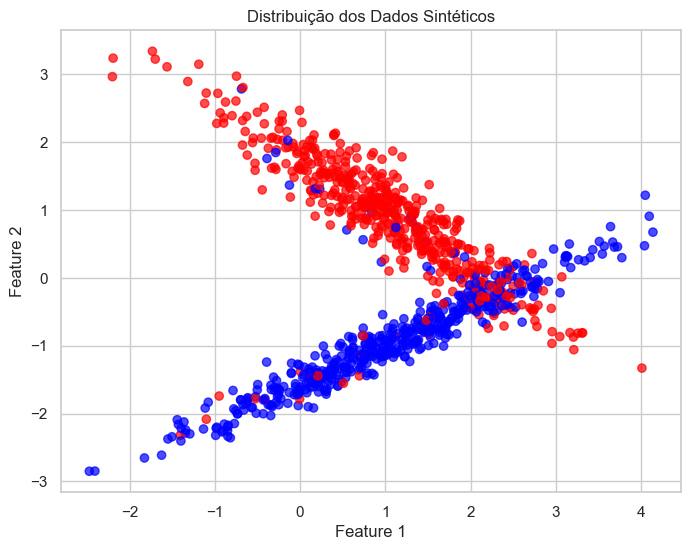

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)
plt.title("Distribuição dos Dados Sintéticos")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.savefig("imagens/dados_sinteticos_distribuicao.png")
plt.show()

## 3. Separação Treino/Teste

Separamos os dados em duas partes: 
- **Treino**: usados para ajustar (treinar) o modelo.
- **Teste**: usados para avaliar o desempenho fora da amostra.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
modelos = {
    "Regressão Logística": LogisticRegression(),
    "Árvore de Decisão": DecisionTreeClassifier(max_depth=5, random_state=42)
}

## 4. Classificador: Regressão Logística

Aplicamos um modelo simples e linear, a regressão logística.
Vamos treinar o modelo e visualizar a fronteira de decisão.

In [19]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predição
y_pred_logreg = logreg.predict(X_test)

# Avaliação
print("=== Regressão Logística ===")
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

=== Regressão Logística ===
[[120  16]
 [ 20 144]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       136
           1       0.90      0.88      0.89       164

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300



## 5. Avaliação: Regressão Logística

Vamos analisar a matriz de confusão e o relatório de classificação do modelo.
Essas métricas indicam o desempenho em termos de acurácia, precisão e recall.

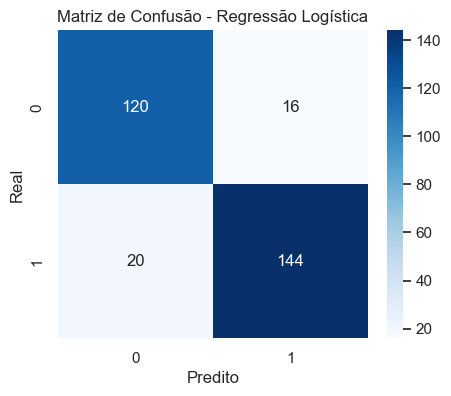

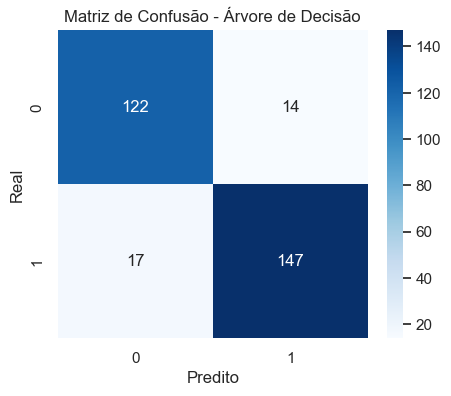

In [13]:
resultados = {}

for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    resultados[nome] = {
        'acuracia': acc,
        'matriz_confusao': cm,
        'relatorio': report
    }

    # Visualiza a matriz de confusão
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Matriz de Confusão - {nome}")
    plt.xlabel("Predito")
    plt.ylabel("Real")
    plt.savefig(f"imagens/matriz_confusao_{nome.lower().replace(' ', '_')}.png")
    plt.show()

## 6. Classificador: Árvore de Decisão

Agora usamos um modelo mais flexível: árvore de decisão.
Esse modelo pode capturar padrões não lineares nos dados.


In [21]:
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train, y_train)

# Predição
y_pred_tree = tree.predict(X_test)

# Avaliação
print("=== Árvore de Decisão ===")
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

=== Árvore de Decisão ===
[[122  14]
 [ 17 147]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       136
           1       0.91      0.90      0.90       164

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



## 7. Avaliação: Árvore de Decisão

Vamos comparar os resultados da árvore com os da regressão logística.
Observe como o modelo se comporta em relação à matriz de confusão e outras métricas.

In [22]:
for nome, res in resultados.items():
    print("\n---", nome, "---")
    print(f"Acurácia: {res['acuracia']:.2f}")
    print("Relatório de Classificação:")
    print(pd.DataFrame(res['relatorio']).transpose())


--- Regressão Logística ---
Acurácia: 0.88
Relatório de Classificação:
              precision    recall  f1-score  support
0              0.857143  0.882353  0.869565   136.00
1              0.900000  0.878049  0.888889   164.00
accuracy       0.880000  0.880000  0.880000     0.88
macro avg      0.878571  0.880201  0.879227   300.00
weighted avg   0.880571  0.880000  0.880129   300.00

--- Árvore de Decisão ---
Acurácia: 0.90
Relatório de Classificação:
              precision    recall  f1-score     support
0              0.877698  0.897059  0.887273  136.000000
1              0.913043  0.896341  0.904615  164.000000
accuracy       0.896667  0.896667  0.896667    0.896667
macro avg      0.895371  0.896700  0.895944  300.000000
weighted avg   0.897020  0.896667  0.896753  300.000000


## 8. Comparação Visual dos Modelos

Plotamos os limites de decisão para ambos os modelos lado a lado.
Isso ajuda a entender como cada modelo separa as classes.

In [24]:
def plot_decision_boundary(model, X, y, title):
    h = .02  # passo da malha
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(6, 4))
    plt.contourf(xx, yy, Z, cmap='bwr', alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

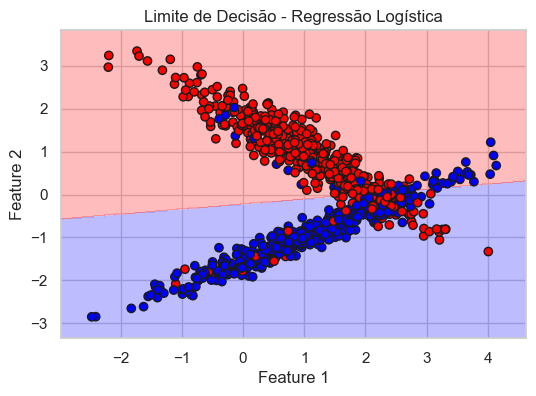

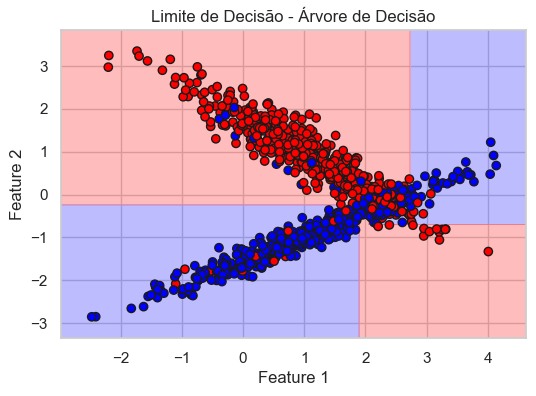

In [25]:
plot_decision_boundary(logreg, X, y, "Limite de Decisão - Regressão Logística")
plot_decision_boundary(tree, X, y, "Limite de Decisão - Árvore de Decisão")

## 9. Conclusão

- A regressão logística cria fronteiras lineares e tende a ter menor variância.
- A árvore de decisão pode capturar padrões mais complexos, mas pode sofrer overfitting.
- Esse exemplo ilustra o trade-off entre simplicidade e complexidade do modelo.